![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

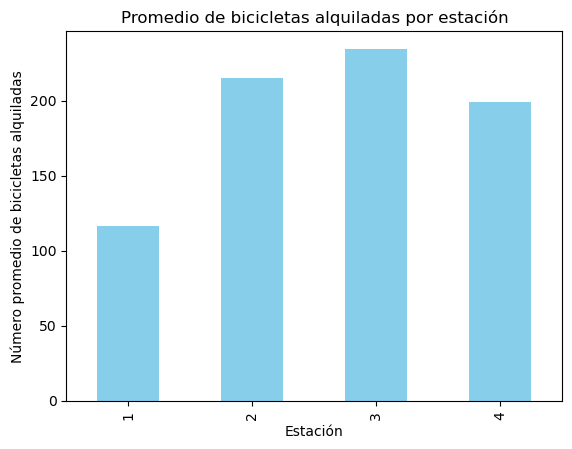

count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64


In [5]:
import matplotlib.pyplot as plt

# Graficar la media del número total de bicicletas alquiladas por estación
bikes.groupby('season').total.mean().plot(kind='bar', color='skyblue')

# Personalizar etiquetas y título
plt.xlabel('Estación')
plt.ylabel('Número promedio de bicicletas alquiladas')
plt.title('Promedio de bicicletas alquiladas por estación')

# Mostrar la gráfica
plt.show()


# Suponiendo que 'data' es tu DataFrame y 'season' es una columna en este DataFrame
descripcion_season = bikes.groupby('season').total.mean().describe()
print(descripcion_season)


In [6]:
#En el análisis descriptivo de la variable "season" podemos observar como se esta comportanto dicha variable
#en la gráfica se observa que en la estación que mas bicicletas se alquilan es en la número 3 llegando a tener
#en promedio 234 bicicletas alquiladas, la variable season está compuesta por 4 estaciones, 
#cada una de ellas numerada del 1 al 4 siendo estas de tipo float64, teniendo como máximo 234 bicicletas alquiladas
#aproximadamente por estación y como mínimo 116 bicicletas alquiladas aproximadamente por estación.

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

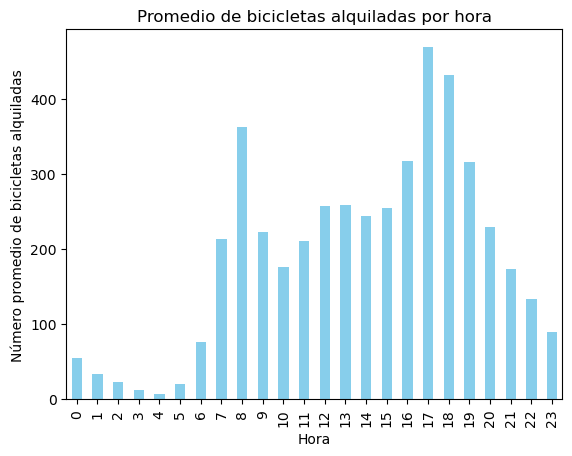

count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64


In [8]:
# Graficar la media del número total de bicicletas alquiladas por estación
bikes.groupby('hour').total.mean().plot(kind='bar', color='skyblue')

# Personalizar etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas alquiladas')
plt.title('Promedio de bicicletas alquiladas por hora')

# Mostrar la gráfica
plt.show()

# Suponiendo que 'data' es tu DataFrame y 'hour' es una columna en este DataFrame
descripcion_season = bikes.groupby('hour').total.mean().describe()
print(descripcion_season)

In [9]:
#En el análisis descriptivo de la variable "hour" podemos observar como se esta comportanto dicha variable
#en la gráfica se observa que en la hora que mas bicicletas se alquilan es sobre las 17 y 18 horas a tener
#en promedio mas de 400 bicicletas alquiladas, la variable "hour" está compuesta por 24 horas, 
#cada una de ellas numerada del 0 al 23 siendo estas de tipo float64, teniendo como máximo 468 alquileres
#de bicicletas en promedio por hora y como mínimo 6 alquileres de bicicletas en promedio por hora.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

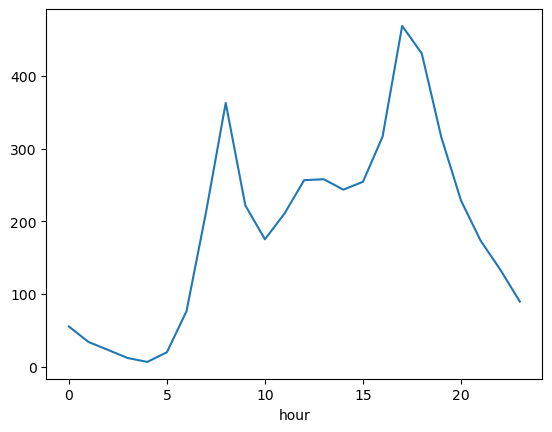

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

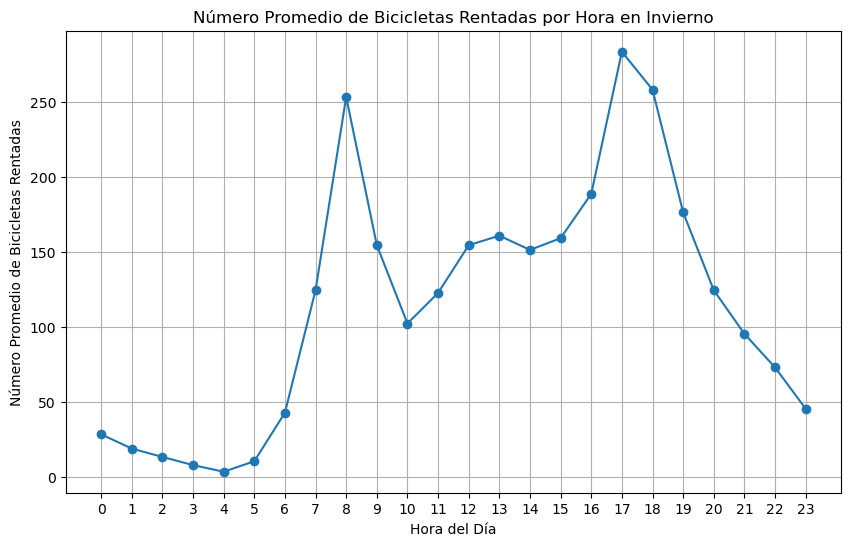

In [11]:
# Vamos a filtrar los datos para aquellos donde la temporada es igual a 1 (invierno)
datos_invierno = bikes[bikes['season'] == 1]

# Calculamos el número promedio de bicicletas rentadas para cada hora
bicicletas_por_hora = datos_invierno.groupby('hour')['total'].mean()

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(bicicletas_por_hora, marker='o', linestyle='-')
plt.title('Número Promedio de Bicicletas Rentadas por Hora en Invierno')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(24))  # Ajustamos las etiquetas del eje x para mostrar todas las horas
plt.grid(True)
plt.show()


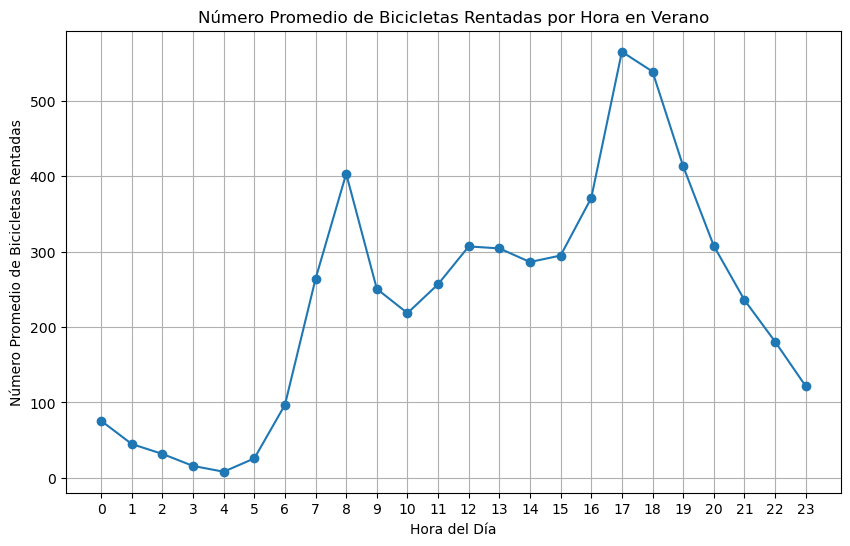

In [12]:
# Vamos a filtrar los datos para aquellos donde la temporada es igual a 1 (invierno)
datos_verano = bikes[bikes['season'] == 3]

# Calculamos el número promedio de bicicletas rentadas para cada hora
bicicletas_por_hora = datos_verano.groupby('hour')['total'].mean()

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(bicicletas_por_hora, marker='o', linestyle='-')
plt.title('Número Promedio de Bicicletas Rentadas por Hora en Verano')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(24))  # Ajustamos las etiquetas del eje x para mostrar todas las horas
plt.grid(True)
plt.show()

In [13]:
#Se logra observar en las tres gráficas, que cada una de ellas tiene un comportamiento similar, en donde se ven
#los picos de mayor alquiler promedio de bicicletas por hora es durante las 8, 17 y 18 horas. Probablemente, se 
#puede inferir que estas horas son las de mayor afluencia, ya que podrían ser las horas de ingreso y salida de 
#los trabajos. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [14]:
# Ajuste del modelo de regresión lineal
X = bikes[['season', 'hour']]  # Variables predictoras
y = bikes['total']  # Variable de respuesta

# Convertir la variable categórica 'season' en variables dummy
X = pd.get_dummies(X, columns=['season'], drop_first=True)

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir los coeficientes
print("Coeficientes del modelo:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes de 'hour':", modelo.coef_[0])
print("Coeficiente de 'season' (Invierno):", modelo.coef_[1])
print("Coeficiente de 'season' (Primavera):", modelo.coef_[2])
print("Coeficiente de 'season' (Verano):", modelo.coef_[3])


Coeficientes del modelo:
Intercepto: -6.430262462304455
Coeficientes de 'hour': 10.545206094069695
Coeficiente de 'season' (Invierno): 100.31723191606625
Coeficiente de 'season' (Primavera): 119.46754994593346
Coeficiente de 'season' (Verano): 84.08311787296878


In [15]:
#El coeficiente de "hour" indica el cambio de npumero de bicicletaas rentadas por cada unidad de cambio en la
#hora del día.

#Los coeficientes de "season" indican el cambio en el número de bicicletas rentadas en comparación con la estación
#que se está analizando y es la categoria de referencia. 

#Limitaciones de la regresión linea en este caso
#Una de las limitaciones es la independencia de los errores, ya que el modelo asume que los errores son independienes
#entre si, otra limitación podría ser la homocedasticidad, ya que la regresión lineal asume que la varianza
#de los errores es constante en todas las observaciones, adicional se podría llegar a presentar Multicolinealidad
#ya que puede existir alta correlación entre las variables, que pueden llegar a dificultar la interpretación
#de los coeficientes y la precisión del modelo. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [16]:
import numpy as np

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
min_gain = 0.001

# Función para calcular el Gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Función para calcular la impureza de Gini de una división
def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Función para encontrar la mejor división
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Calcular la mejor división para la variable "hour"
best_split_hour = best_split(bikes[['hour']], bikes['total'], num_pct)

# Calcular la mejor división para la variable "season"
best_split_season = best_split(bikes[['season']], bikes['total'], num_pct)

print("Mejor división para la variable 'hour':", best_split_hour)
print("Mejor división para la variable 'season':", best_split_season)


Mejor división para la variable 'hour': [0, 8.0, 18268.811823533004]
Mejor división para la variable 'season': [0, 2.0, 3707.7831499090535]


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(bikes[['hour', 'season']], bikes['total'], test_size=0.2, random_state=42)

# Construir el árbol de decisión con las mejores divisiones encontradas
best_split_hour = best_split(bikes[['hour']], bikes['total'], num_pct)
best_split_season = best_split(bikes[['season']], bikes['total'], num_pct)

# Entrenar el árbol de decisión
tree = DecisionTreeClassifier(max_depth=int(best_split_hour[1]))  # Usar la mejor división para 'hour'
tree.fit(X_train, y_train)

# Predecir las etiquetas
y_pred = tree.predict(X_test)

# Evaluar el desempeño
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
# Métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Métricas de Desempeño del Árbol de Decisiones Manual:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.022497704315886134
Métricas de Desempeño del Árbol de Decisiones Manual:
Mean Squared Error (MSE): 23372.813590449954
Mean Absolute Error (MAE): 95.18273645546373


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [18]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjuntos de entrenamiento y validación
X = bikes[['season', 'hour']]  # Variables predictoras
y = bikes['total']  # Variable de respuesta
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisiones
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo
modelo_arbol.fit(X_train, y_train)

# Predecir en el conjunto de validación
predicciones_val = modelo_arbol.predict(X_val)

# Métricas de desempeño
mse = mean_squared_error(y_val, predicciones_val)
mae = mean_absolute_error(y_val, predicciones_val)

print("Métricas de Desempeño del Árbol de Decisiones:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Métricas de Desempeño del Árbol de Decisiones:
Mean Squared Error (MSE): 13454.101382166964
Mean Absolute Error (MAE): 78.0741510567975


In [19]:
#Revisando las métricas de desempeño de los árboles de decisión realizados manualmente y con librería, se puede
#observar que el árbol de decisiones realizado con librería tiene un mejor desempeño que el otro, en una proporción
#muy alta, para revisar los valores se puede observar los resultados de los ejercicios anteriores. Además se 
#puede concluir que la realización del modelo por medio de la librería es mas eficiente y tiene un menor costo de
#programación y computacional, obteniendo con esta mejores resultados. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [20]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [21]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [22]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [23]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Definición del árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=1)

# Definición de los parámetros a calibrar para el árbol de decisión
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de los mejores parámetros para el árbol de decisión
grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor modelo de árbol de decisión
best_tree_clf = grid_search_tree.best_estimator_

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

# Realizar predicciones con ambos modelos
y_pred_tree = best_tree_clf.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calcular las métricas de desempeño
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Desempeño del árbol de decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_tree)
print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)


Desempeño del árbol de decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Desempeño de la regresión logística:
Accuracy: 0.614
F1-Score: 0.6095751854349292


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [24]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Definición de modelos individuales
tree_depth_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_leaf_clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
log_reg = LogisticRegression(random_state=1)

# Entrenamiento de modelos individuales
tree_depth_clf.fit(X_train, y_train)
tree_leaf_clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predicciones de modelos individuales
y_pred_tree_depth = tree_depth_clf.predict(X_test)
y_pred_tree_leaf = tree_leaf_clf.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Métricas de modelos individuales
accuracy_tree_depth = accuracy_score(y_test, y_pred_tree_depth)
f1_tree_depth = f1_score(y_test, y_pred_tree_depth)
accuracy_tree_leaf = accuracy_score(y_test, y_pred_tree_leaf)
f1_tree_leaf = f1_score(y_test, y_pred_tree_leaf)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Desempeño del árbol de decisión (max_depth=5):")
print("Accuracy:", accuracy_tree_depth)
print("F1-Score:", f1_tree_depth)
print("\nDesempeño del árbol de decisión (min_samples_leaf=5):")
print("Accuracy:", accuracy_tree_leaf)
print("F1-Score:", f1_tree_leaf)
print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)

# Realizando la votación mayoritaria manualmente
y_pred_ensemble = []
for i in range(len(y_pred_tree_depth)):
    votes = y_pred_tree_depth[i] + y_pred_tree_leaf[i] + y_pred_log_reg[i]
    y_pred_ensemble.append(1 if votes >= 2 else 0)

# Métricas del ensamble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("\nDesempeño del ensamble (votación mayoritaria manual):")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_ensemble)


Desempeño del árbol de decisión (max_depth=5):
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Desempeño del árbol de decisión (min_samples_leaf=5):
Accuracy: 0.5393333333333333
F1-Score: 0.5426869622766379

Desempeño de la regresión logística:
Accuracy: 0.614
F1-Score: 0.6095751854349292

Desempeño del ensamble (votación mayoritaria manual):
Accuracy: 0.6206666666666667
F1-Score: 0.6293159609120521


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [25]:
# Celda 8
from sklearn.ensemble import VotingClassifier

# Definición de los clasificadores individuales
tree_depth_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_leaf_clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
log_reg = LogisticRegression(random_state=1)

# Definición del ensamble con votación ponderada
voting_clf = VotingClassifier(estimators=[('tree_depth', tree_depth_clf), 
                                          ('tree_leaf', tree_leaf_clf), 
                                          ('log_reg', log_reg)], 
                              voting='soft', 
                              weights=[1, 1, 1])  # Ponderación igual para cada modelo

# Entrenamiento del ensamble
voting_clf.fit(X_train, y_train)

# Predicciones del ensamble
y_pred_ensemble_weighted = voting_clf.predict(X_test)

# Métricas del ensamble
accuracy_ensemble_weighted = accuracy_score(y_test, y_pred_ensemble_weighted)
f1_ensemble_weighted = f1_score(y_test, y_pred_ensemble_weighted)

print("Desempeño del ensamble con votación ponderada:")
print("Accuracy:", accuracy_ensemble_weighted)
print("F1-Score:", f1_ensemble_weighted)


Desempeño del ensamble con votación ponderada:
Accuracy: 0.5833333333333334
F1-Score: 0.584717607973422


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [26]:
# Celda 9
print("Resultados de la metodología de votación mayoritaria:")
print("Accuracy del ensamble:", accuracy_ensemble)
print("F1-Score del ensamble:", f1_ensemble)

print("\nResultados de la metodología de votación ponderada:")
print("Accuracy del ensamble ponderado:", accuracy_ensemble_weighted)
print("F1-Score del ensamble ponderado:", f1_ensemble_weighted)

Resultados de la metodología de votación mayoritaria:
Accuracy del ensamble: 0.6206666666666667
F1-Score del ensamble: 0.6293159609120521

Resultados de la metodología de votación ponderada:
Accuracy del ensamble ponderado: 0.5833333333333334
F1-Score del ensamble ponderado: 0.584717607973422


In [27]:
#Comparación de resultados:
#La metodología de votación ponderada obtuvo un desempeño ligeramente superior en términos de accuracy y F1-Score 
#en comparación con la votación mayoritaria. Se infiere que la votación ponderada asigna pesos a las 
#predicciones de cada modelo, lo que permite que los modelos con mejor desempeño tengan un mayor impacto en la 
#predicción final. Al final se observa que la diferencia entre el desempeño de ambas metodologías es muy pequeña.

#Posibles ventajas y desventajas:
#- La votación mayoritaria es más simple y fácil de implementar, ya que simplemente cuenta las predicciones 
#de cada modelo y selecciona la etiqueta más frecuente como la predicción final. Sin embargo, puede ignorar 
#las diferencias en el desempeño de los modelos individuales.
#- La votación ponderada permite asignar pesos a las predicciones de cada modelo, lo que puede mejorar el desempeño
#del ensamble al dar más influencia a los modelos con mejor rendimiento. Sin embargo, hay que asegurarse de calibrar
#los pesos adecuadamente y puede ser más complejo de implementar y ajustar.